## Jupyter Placeholder with learn-env

### Problem:

- Microsoft want to create a new movie studio but have no idea about creating movies
- respondible to ecplore what types of films are currently doing the best at the box office
- turn analysis to actionable insights
- the results from that will help Microsoft's new movie studio decide what type of films to create.

## Data understanding

### IMDB Database

* `movie_basics` : Table containing movies including original movie title, premiered movie title(primary title?), release year, length of the movie and the genre
* `persons` : Table containing the name of people in the theatre entertainment industry and their primary profession (actor, director etc.)
* `directors`: Table with movie ID and its correspongin director's ID
* `known_for`: Table containing the person's ID and the corresponding movie ID that the person is known for.
* `movie_akas`: Table containing movies and the title they are known as in different countries.
* `movie_ratings`: Table containing movie ID and their average rating and number of ratings they received on IMDB
* `principals`: Table containing movie ID and the corresponding person ID that is involved in the movie in some sort of capacity, specified in the category, jobs and character (if they are actors) columns.
* `writers` : Table containing movie ID and their corresponding writers' person ID

### bom.movie_gross.csv
* **Source** : This dataset comes from [Box office mojo](https://www.boxofficemojo.com/) - a website that tracks film revenue
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### rotten_tomatoes_movies.csv
* **Source** : This dataset comes from [Rotten Tomatoes](https://www.rottentomatoes.com/) - an "online aggregator of movie and TV show reviews from critics"
* **Contents** : Data about movies including their synopsis, rating, genre, director, writer, release data in theatre, release data on DVD, Box office rental profit, length of movie and studio of production.

### tmdb.movies.csv
* **Contents** : Data about movies' domestic and international gross profit along with the name of studio production and release year

### tn.movie_budgets.csv
* **Contents** : Data about movies' production budget along with release date, domestic gross and worldwide gross


Below we import the `sqlite3`, `pandas` and `numpy`, which will be used to for reading and exploring our data. We are also importing `seaborn` and `matplotlib` modules, which we will use for visualization.

In [1]:
#Run this cell without changes
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Functions for our analysis

In [5]:
strings_to_remove = ['$',',']

def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds


In [6]:
def read_sql_as_df(table_name, con):
    """
    Selects all columns in a database table and convert it into a Dataframe
    -
    Input:
    table_name = takes in a string of the table name to import
    con = variable that has the established database connection   
    -
    Output:
    DataFrame containing all columns of the database table.
    """
    query = """SELECT * FROM ({table_name})""".format(table_name = table_name)
    return pd.read_sql(query,con)

### IMDB Data

In [6]:
conn = sqlite3.connect('./zippedData/im.db')

In [7]:
imdb_schema = pd.read_sql("""

SELECT * from sqlite_master

""",conn)
imdb_schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [8]:
movie_akas_df = read_sql_as_df('movie_akas',conn)
movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [9]:
movie_ratings_df = read_sql_as_df('movie_ratings',conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [10]:
directors_df = read_sql_as_df('directors',conn)
directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [11]:
writers_df = read_sql_as_df('writers',conn)
writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [12]:
movie_basics_df = read_sql_as_df('movie_basics',conn)
movie_basics_df.tail()
# movie_basics.columns

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [13]:
persons_df = read_sql_as_df('persons',conn)
persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [14]:
known_for_df = read_sql_as_df("known_for",conn)
known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [15]:
principals_df = read_sql_as_df("principals",conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


### Non database data

#### Rotten Tomatoes

In [16]:
rt_movies_df = pd.read_csv('./zippedData/rotten_tomatoes_movies.csv')
rt_movies_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


#### The number (budgets)

In [19]:
movie_budget_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()
# movie_budget_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Box office mojo (gross profit)

In [81]:
movie_gross_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head()
# movie_gross_df.info()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


#### TMDB movies

In [21]:
tmdb_movies_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
remove_chars(tmdb_movies_df['genre_ids'],["[","]"]) #genre_ids now is a string. Function turns it into a list.

tmdb_movies_df.head()
# tmdb_movies_df.info()

<ipython-input-4-f1f9ac6d6bb5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[idx] = row.replace(char,"")


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"12, 14, 10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"14, 12, 16, 10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"12, 28, 878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"16, 35, 10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"28, 878, 12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [22]:
#Rreplace field that's entirely space (or empty) with '101', which is the genre key for genre "Unknown"
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].str.replace(r'^\s*$','101')

In [23]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### Clean TMDB table

In [26]:
tmdb_genre= {28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western',
 101: 'Unknown'}

In [29]:
genre_names_lists=[]
idx = 0
for genre_list in tmdb_movies_df['genre_ids']:
    genre_list = genre_list.split(', ')
    genre_names=[]
    genre_names = [tmdb_genre[int(genre_id)] for genre_id in genre_list]
    genre_names_lists.append(genre_names)
tmdb_movies_df['genre_names'] = genre_names_lists

In [7]:
tmdb_movies_df.head()

NameError: name 'tmdb_movies_df' is not defined

## Genre Popularity 

## Top 20 Studios

#### Rotten Tomatoes

In [58]:
rt_movies_df_cleaned = rt_movies_df.dropna(subset = ['production_company','audience_rating'])
rt_movies_df_cleaned = rt_movies_df_cleaned.reset_index(drop = True)

In [59]:
rt_movies_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16972 entries, 0 to 16971
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              16972 non-null  object 
 1   movie_title                       16972 non-null  object 
 2   movie_info                        16767 non-null  object 
 3   critics_consensus                 9020 non-null   object 
 4   content_rating                    16972 non-null  object 
 5   genres                            16957 non-null  object 
 6   directors                         16823 non-null  object 
 7   authors                           15665 non-null  object 
 8   actors                            16695 non-null  object 
 9   original_release_date             16069 non-null  object 
 10  streaming_release_date            16696 non-null  object 
 11  runtime                           16762 non-null  float64
 12  prod

In [173]:
studio_dict={"Sony": "Sony Pictures Entertainment", "Warner":"Warner Brothers","Fox":"21st Century Fox"
             , "Paramount":"Paramount Pictures",'MGM':'MGM', 'HBO':"HBO","Lion":"Lions Gate","Miramax":"Miramax",
             "Disney": "Walt Disney","WARNER":"Warner Brothers", "Buena":"Buena Vista","MCA":"Universal Pictures"}

In [174]:
len(rt_movies_df_cleaned['production_company'].unique())

2759

In [175]:
rt_movies_df_cleaned.shape

(16972, 22)

In [176]:
idx = 0
for company in rt_movies_df_cleaned['production_company']:
    for key,value in studio_dict.items():
        if key in company:
#             print (company, value)
#             print ("Before: ", rt_movies_df_cleaned['production_company'][idx])
            rt_movies_df_cleaned['production_company'][idx] = value
#             print("After: ", rt_movies_df_cleaned['production_company'][idx])
    idx +=1     

<ipython-input-176-a7adf304c4b5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movies_df_cleaned['production_company'][idx] = value


In [177]:
len(rt_movies_df_cleaned['production_company'].unique())

2756

In [178]:
rt_movies_df_cleaned.shape

(16972, 22)

In [179]:
top_20_studios = list(rt_movies_df_cleaned['production_company'].value_counts().index)[0:20]
top_20_studios_counts = rt_movies_df_cleaned['production_company'].value_counts()[0:20]
top_20_studios_counts

Warner Brothers                1254
Sony Pictures Entertainment    1073
21st Century Fox                905
Paramount Pictures              808
Universal Pictures              665
MGM                             598
Lions Gate                      454
IFC Films                       413
Miramax                         329
Netflix                         329
Walt Disney                     260
Magnolia Pictures               254
Columbia Pictures               237
Buena Vista                     236
United Artists                  168
New Line Cinema                 147
Focus Features                  133
HBO                             132
Criterion Collection            112
Gravitas Ventures               111
Name: production_company, dtype: int64

In [180]:
#Filter dataframe to just movies produced by the top 50 studios
rt_movies_top_20_studios = rt_movies_df_cleaned[rt_movies_df_cleaned['production_company'].isin(top_20_studios)]
rt_movies_top_20_studios.tail(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
16969,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,...,21st Century Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
16970,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,...,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


In [181]:
average_rating_by_studio = rt_movies_top_20_studios.groupby('production_company').mean()['audience_rating']
average_rating_by_studio = average_rating_by_studio.reindex(index=top_20_studios_counts.index)
# average_rating_by_studio = average_rating_by_studio.sort_values(ascending = False)
average_rating_by_studio

Warner Brothers                62.213716
Sony Pictures Entertainment    61.731594
21st Century Fox               62.423204
Paramount Pictures             61.902228
Universal Pictures             61.218045
MGM                            63.198997
Lions Gate                     57.200441
IFC Films                      55.489104
Miramax                        64.510638
Netflix                        60.501520
Walt Disney                    65.003846
Magnolia Pictures              58.322835
Columbia Pictures              63.092827
Buena Vista                    62.072034
United Artists                 68.434524
New Line Cinema                62.530612
Focus Features                 64.082707
HBO                            64.333333
Criterion Collection           84.000000
Gravitas Ventures              59.747748
Name: audience_rating, dtype: float64

#### BOM data

In [82]:
import numpy as np

#cleaning up foreign gross film
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].map(lambda x: 0 if x is np.nan else x)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(",",'')
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].fillna(0)

In [86]:
#cleaning up domestic gross
movie_gross_df['domestic_gross'] = movie_gross_df['domestic_gross'].fillna(0)


In [87]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [88]:
movie_gross_df['total_gross'] = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']

In [89]:
movie_gross_df.sample(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
362,Mr. Popper's Penguins,Fox,68200000.0,119100000.0,2011,187300000.0
2297,Alleluia,MBox,6300.0,0.0,2015,6300.0
732,The Twilight Saga: Breaking Dawn Part 2,LG/S,292300000.0,537400000.0,2012,829700000.0
133,Case 39,ParV,13300000.0,14900000.0,2010,28200000.0
1144,G.I. Joe: Retaliation,Par.,122500000.0,253200000.0,2013,375700000.0
2387,Deepwater Horizon,LG/S,61400000.0,60400000.0,2016,121800000.0
1089,Double Trouble,CL,44800.0,0.0,2012,44800.0
2559,Toni Erdmann,SPC,1500000.0,0.0,2016,1500000.0
120,Agora,NM,619000.0,38400000.0,2010,39019000.0
132,The Losers,WB,23600000.0,5800000.0,2010,29400000.0


In [90]:
studio_counts = movie_gross_df['studio'].value_counts()[0:20]

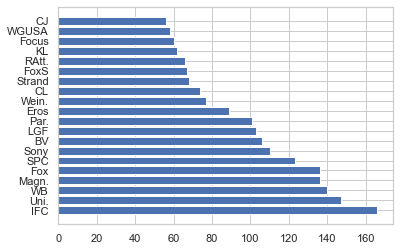

In [91]:
#How many movies each studio make

fig, ax = plt.subplots()

ax.barh(list(studio_counts.index), list(studio_counts.values))

plt.show()

In [92]:
#Create empty dictionary that we will populate with studios as keys and average total worldwide gross
#of all movies in the genre as values
studio_avg_gross ={} 

#Calculating average worldwide gross:
for studio in list(studio_counts.index): #loop through studios in the studio list 
    n = 0 #number of movies 
    gross_sum = 0 #rating summation
    idx =0  #keep track of row index
    for row in movie_gross_df['studio']: #go down row by row in studio column
        if (row==studio): #if genre in genre list is in genre in the row
#             print(test['averagerating'][0])
            gross_sum += movie_gross_df['total_gross'][idx] #grab the total gross and add it to the total sum
            n+=1 #add one to count of movie with that studio production
        idx +=1 #keep track of row index
    studio_avg_gross[studio] = gross_sum/n #calculate average rating of the genre
    
studio_avg_gross_values_sorted =dict(sorted(studio_avg_gross.items(),key=lambda item: item[1]))
studio_avg_gross_keys_sorted = dict(sorted(studio_avg_gross.items(),key=lambda item: item[0]))

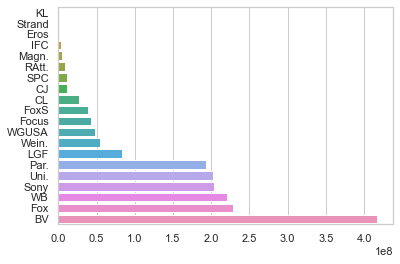

In [99]:
fig, ax = plt.subplots()

sns.barplot(y=list(studio_avg_gross_values_sorted.keys()), x=list(studio_avg_gross_values_sorted.values()))

plt.show()

In [183]:
studio_avg_gross_top20 = {'IFC Films': 3080677.698795181,
 'Universal Pictures': 202429688.37687075,
 'Warner Brothers': 220256778.55714285,
 'Magnolia Pictures': 4181532.345588235,
 '21st Century Fox': 133088969.11391571,
 'Sony Pictures Entertainment': 107527411.510643,
 'Buena Vista': 417102678.29339623,
 'Lions Gate': 83510511.65048544,
 'Paramount Pictures': 193556987.0990099,
 'Focus Features': 42366833.31666667,
 'MGM': 9680000000,
 'Netflix':25000000000,
 'Miramax':0,
 'Walt Disney':67400000000,
 'Columbia Pictures':561820000,
 'United Artists':160772007,
 'New Line Cinema':139141620.12396694214876,
 'HBO':7700000000,
 'Criterion Collection':0, "Gravitas Ventures": 0}


In [186]:
studio_avg_gross_top20_ds = pd.DataFrame.from_dict(studio_avg_gross_top20, orient = "index")

In [188]:
studio_avg_gross_top20_ds = studio_avg_gross_top20_ds.reindex(index=top_20_studios_counts.index)

In [192]:
studio_avg_gross_top20_ds

,0
Warner Brothers,2.202568e+08
Sony Pictures Entertainment,1.075274e+08
21st Century Fox,1.330890e+08
Paramount Pictures,1.935570e+08
Universal Pictures,2.024297e+08
MGM,9.680000e+09
Lions Gate,8.351051e+07
IFC Films,3.080678e+06
Miramax,0.000000e+00
Netflix,2.500000e+10


<AxesSubplot:xlabel='0'>

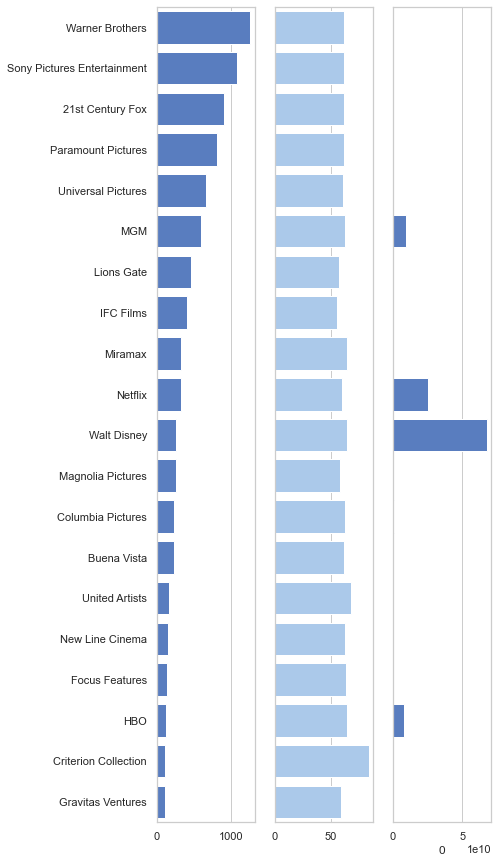

In [193]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1,ncols=3,figsize=(6, 15), sharey=True)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=average_rating_by_studio.index, x=average_rating_by_studio.values,
            label="Average Rating", color="b", ax =ax[1])

sns.set_color_codes("muted")
sns.barplot(y=top_20_studios_counts.index, x=top_20_studios_counts.values, ax=ax[0],
            label="Number of movies produced", color="b")
sns.set_color_codes("muted")
sns.barplot(y=studio_avg_gross_top20_ds.index, x=studio_avg_gross_top20_ds[0], ax=ax[2],
            label="Number of movies produced", color="b")

# Add a legend and informative axis label
# ax.legend(ncol=1, loc="lower right", frameon=True)
# ax.set(xlim=(0,100), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)